In [114]:
import os
import numpy as np
import pandas as pd
import tensorflow
import matplotlib.pyplot as plt

# Image File Renaming and Merging Sub-Folders Data

In [115]:
#### Image File Renaming Utility to Automate the image file names and copying the renamed images into 1 0f 3 
# classes / lables respectively: This code was run once to do the job !

# --------------------------------------------------------------------------------------------#
"""
path = 'D:/My Documents New/DL ML BC CC/Dice Analytics/Assignment/Project 1/OCT_Dataset_TL'
data_dir_list = os.listdir(path) # converting class folder names to list
#print(data_dir_list)
no_images=0
img=0

for dataset in data_dir_list:                          # to dataset subfolder/class name
    img_list = os.listdir(path + '/' + dataset)        # accessing images' names of subfolder as list
    new_dir_AMD = 'D:/My Documents New/DL ML BC CC/Dice Analytics/Assignment/Project 1/OCT_Dataset_TL_New/AMD'
    new_dir_DME = 'D:/My Documents New/DL ML BC CC/Dice Analytics/Assignment/Project 1/OCT_Dataset_TL_New/DME'
    new_dir_NORMAL = 'D:/My Documents New/DL ML BC CC/Dice Analytics/Assignment/Project 1/OCT_Dataset_TL_New/NORMAL'

for img in img_list:
        old_name = path + '/' + dataset + '/' + img
        new_name = dataset + "_" + img 
        if dataset[0]==  'A':
            dst1 = new_dir_AMD + '/' + new_name
 
        if dataset[0]==  'D':
            dst1 = new_dir_DME + '/' + new_name
        
        if dataset[0]==  'N':
            dst1 = new_dir_NORMAL + '/' + new_name
        
        os.rename(old_name, dst1)        # e.g. image 01.tif from subfolder AMD1 is renamed to AMD1_01.tif  """   
        


'\npath = \'D:/My Documents New/DL ML BC CC/Dice Analytics/Assignment/Project 1/OCT_Dataset_TL\'\ndata_dir_list = os.listdir(path) # converting class folder names to list\n#print(data_dir_list)\nno_images=0\nimg=0\n\nfor dataset in data_dir_list:                          # to dataset subfolder/class name\n    img_list = os.listdir(path + \'/\' + dataset)        # accessing images\' names of subfolder as list\n    new_dir_AMD = \'D:/My Documents New/DL ML BC CC/Dice Analytics/Assignment/Project 1/OCT_Dataset_TL_New/AMD\'\n    new_dir_DME = \'D:/My Documents New/DL ML BC CC/Dice Analytics/Assignment/Project 1/OCT_Dataset_TL_New/DME\'\n    new_dir_NORMAL = \'D:/My Documents New/DL ML BC CC/Dice Analytics/Assignment/Project 1/OCT_Dataset_TL_New/NORMAL\'\n\nfor img in img_list:\n        old_name = path + \'/\' + dataset + \'/\' + img\n        new_name = dataset + "_" + img \n        if dataset[0]==  \'A\':\n            dst1 = new_dir_AMD + \'/\' + new_name\n \n        if dataset[0]==  \'D\'

# Spliting Data/Folders into train, validation and test 

In [116]:
#import splitfolders
#splitfolders.ratio('D:/My Documents New/DL ML BC CC/Dice Analytics/Assignment/Project 1/OCT_Dataset_TL_New', output="OCT_test_val_train_Dataset_TL", seed=1337, ratio=(0.7,0.1,0.2)) 

#Uncomment code to split dataset (train:val:test --> 0.7:0.1:0.2)

In [117]:
train_data_dir = "D:/My Documents New/DL ML BC CC/Dice Analytics/Assignment/Project 1/OCT_test_val_train_Dataset_TL/train"
val_data_dir = "D:/My Documents New/DL ML BC CC/Dice Analytics/Assignment/Project 1/OCT_test_val_train_Dataset_TL/val"
test_data_dir = "D:/My Documents New/DL ML BC CC/Dice Analytics/Assignment/Project 1/OCT_test_val_train_Dataset_TL/test"

		AMD:  723 	DME:  1101 	NORMAL:  1407 

	Total Images:  3231


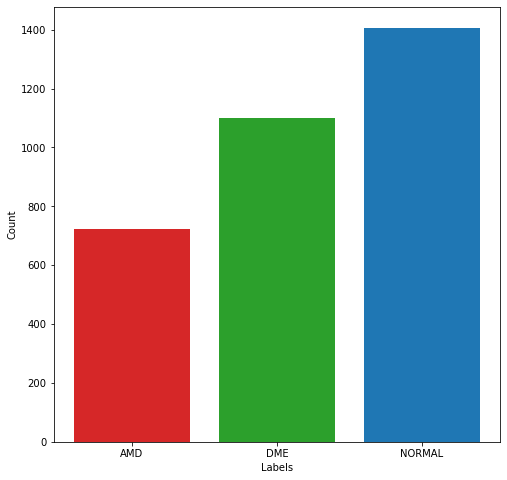

In [118]:
data_dir = 'D:/My Documents New/DL ML BC CC/Dice Analytics/Assignment/Project 1/OCT_Dataset_TL_New'

data_dir_list = os.listdir(data_dir)

no_images=0
for dataset in data_dir_list:
    if dataset[0] == 'A':
        amd_images = len(os.listdir(data_dir + '/' + dataset))

    if dataset[0] == 'D':
        dme_images = len(os.listdir(data_dir + '/' + dataset))
    
    if dataset[0] == 'N':
        normal_images = len(os.listdir(data_dir + '/' + dataset))

print('\t\tAMD: ' , amd_images, '\tDME: ', dme_images, '\tNORMAL: ', normal_images, '\n\n\tTotal Images: ', amd_images + dme_images + normal_images)

data= {'AMD': amd_images, 'DME': dme_images, 'NORMAL': normal_images}
labels = list(data.keys()) 
count = list(data.values()) 

plt.rcParams['figure.figsize'] = (8.0, 8.0)
plt.bar(labels, count, color=['tab:red', 'tab:green', 'tab:blue'])
plt.axis('on')
plt.xlabel("Labels") 
plt.ylabel("Count") 
plt.savefig('labels_vs_counts.png', transparent= False, bbox_inches= 'tight', dpi= 400)
plt.show()


# VGG-16 Model, with the Final Fully-Connected Layers Removed

In [119]:
from tensorflow.keras.applications.vgg16 import VGG16
conv_base = VGG16(weights='imagenet',
include_top=False,
input_shape=(150, 150, 3))
conv_base.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

# Data Pre-Processing and Fast Features Extraction 


In [120]:
img_width, img_height = 150, 150 
channels = 3
batch_size = 32

In [121]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count,3))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode="categorical")
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [122]:
X_train, y_train = extract_features(train_data_dir,2260)

Found 2260 images belonging to 3 classes.


In [123]:
X_val, y_val = extract_features(val_data_dir, 322)

Found 322 images belonging to 3 classes.


In [124]:
X_test, y_test = extract_features(test_data_dir,649)

Found 649 images belonging to 3 classes.


In [125]:
X_train = np.reshape(X_train, (2260, 4*4* 512))
X_val = np.reshape(X_val, (322, 4*4* 512))
X_test = np.reshape(X_test, (649, 4*4* 512))
X_val.shape

(322, 8192)

#  Model Architecture

In [128]:
from tensorflow.keras import models, layers
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dropout_10 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 3)                 771       
Total params: 2,098,179
Trainable params: 2,098,179
Non-trainable params: 0
_________________________________________________________________


# Compile the Model

In [129]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

# Train the Model

In [130]:
from tensorflow.keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='OCTvgg16.weights.best.hdf5', verbose=1, 
                             save_best_only=True)
model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), 
          callbacks = checkpointer, verbose=1, shuffle=True)


'''

history = model.fit(X_train, y_train,
epochs=30,
batch_size=20,
validation_data=(X_val, y_val))'''

Epoch 1/20
71/71 [==============================] - 2s 29ms/step - loss: 0.8280 - accuracy: 0.7239 - val_loss: 0.3253 - val_accuracy: 0.8540

Epoch 00001: val_loss improved from inf to 0.32529, saving model to OCTvgg16.weights.best.hdf5
Epoch 2/20
71/71 [==============================] - 2s 27ms/step - loss: 0.3154 - accuracy: 0.8708 - val_loss: 0.2124 - val_accuracy: 0.9161

Epoch 00002: val_loss improved from 0.32529 to 0.21244, saving model to OCTvgg16.weights.best.hdf5
Epoch 3/20
71/71 [==============================] - 2s 32ms/step - loss: 0.1853 - accuracy: 0.9305 - val_loss: 0.1048 - val_accuracy: 0.9658

Epoch 00003: val_loss improved from 0.21244 to 0.10480, saving model to OCTvgg16.weights.best.hdf5
Epoch 4/20
71/71 [==============================] - 2s 34ms/step - loss: 0.1405 - accuracy: 0.9456 - val_loss: 0.0974 - val_accuracy: 0.9596

Epoch 00004: val_loss improved from 0.10480 to 0.09743, saving model to OCTvgg16.weights.best.hdf5
Epoch 5/20
71/71 [======================

'\n\nhistory = model.fit(X_train, y_train,\nepochs=30,\nbatch_size=20,\nvalidation_data=(X_val, y_val))'

# Load the Model with the Best Validation Accuracy

In [131]:
#load the weights that yielded the best validation accuracy
model.load_weights('OCTvgg16.weights.best.hdf5')

# Calculate Classification Accuracy on Test Set

In [133]:
score = model.evaluate(X_test, y_test, verbose=1)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

21/21 [==============================] - 0s 3ms/step - loss: 0.0223 - accuracy: 0.9923
Test Loss: 0.022260019555687904
Test accuracy: 0.9922958612442017


In [132]:
# get index of predicted dog breed for each image in test set
vgg16_predictions = [np.argmax(model.predict(np.expand_dims(feature, axis=0))) 
                     for feature in X_test]

# report test accuracy
test_accuracy = 100*np.sum(np.array(vgg16_predictions)==
                           np.argmax(y_test, axis=1))/len(vgg16_predictions)
print('\nTest accuracy: %.4f%%' % test_accuracy)


Test accuracy: 99.2296%


[[5.543e-05 9.994e-01 5.585e-04]
 [8.386e-12 5.352e-07 1.000e+00]
 [8.596e-13 1.294e-06 1.000e+00]
 ...
 [3.401e-08 1.282e-04 9.999e-01]
 [9.142e-16 1.003e-10 1.000e+00]
 [9.941e-01 1.156e-03 4.779e-03]]
[1 2 2 2 1 1 1 2 0 2 2 2 1 1 0 2 2 1 1 1 0 2 2 2 1 2 0 2 0 2 1 0 1 2 1 2 1
 2 2 1 2 2 1 1 2 2 2 1 0 0 1 2 2 1 1 1 2 2 2 2 2 2 1 1 0 1 0 1 1 1 0 2 0 2
 2 0 2 2 2 0 1 1 2 0 2 0 1 2 1 2 2 0 2 1 1 2 2 1 1 2 2 1 0 1 2 1 1 0 1 2 2
 2 1 0 0 2 2 2 1 2 1 1 1 1 1 2 1 2 2 0 2 1 1 1 2 0 1 2 1 2 2 0 1 0 1 2 1 1
 0 1 1 1 1 0 2 2 2 0 1 2 2 0 0 1 2 1 2 2 1 0 1 2 1 1 1 2 1 1 2 1 0 0 2 0 2
 1 0 2 1 2 1 0 2 1 0 1 0 0 2 2 2 2 2 2 0 1 0 2 0 1 2 2 1 0 1 2 0 2 2 0 1 1
 2 0 2 2 1 0 2 0 2 0 2 2 1 0 2 1 0 1 2 0 1 2 2 0 1 2 2 2 0 1 1 2 2 1 2 0 2
 0 0 1 0 2 2 2 1 1 0 2 2 2 2 1 2 1 0 2 0 2 2 1 1 0 1 2 1 1 2 1 0 1 2 1 2 1
 0 0 1 2 2 2 0 0 2 1 1 0 0 2 2 1 0 2 2 0 1 0 2 2 1 0 1 2 0 1 2 1 1 0 2 0 2
 0 2 1 2 0 0 2 0 0 1 1 2 2 0 1 0 1 1 2 1 0 0 2 2 2 2 1 2 0 1 0 1 1 1 2 2 0
 2 2 1 1 1 2 1 1 1 1 1 1 2 0 0 0 2 2 2 2 2 0 2

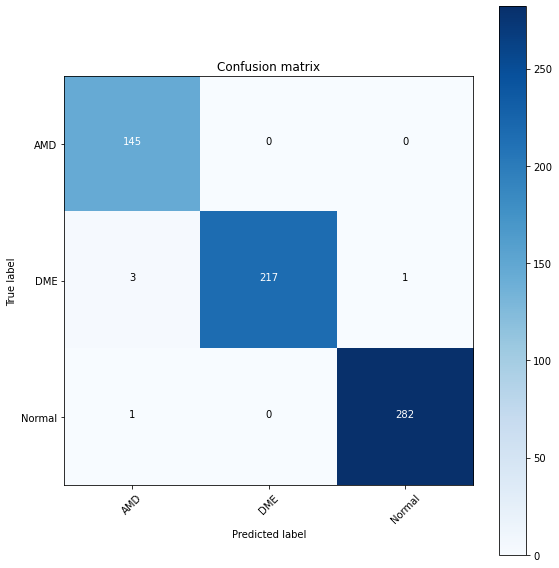

In [134]:
# Predict model on Test Data

Y_pred = model.predict(X_test)
print(Y_pred)

# Printing the confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
import itertools

# Print the classes of the Prediction
y_pred = np.argmax(Y_pred,axis = 1) 
print(y_pred)

target_names = ['AMD', 'DME', 'Normal']
                                        
# Plotting the confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Computation  confusion matrix
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=3)

plt.figure()

# Plotting non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
plt.show()